In [1]:
# Utils
# ==============================================================================
import warnings

# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
# ==============================================================================
import pandas as pd
import numpy as np

from sklearn.preprocessing import (StandardScaler)
from sklearn.pipeline import Pipeline


## Model
# ==============================================================================
from sklearn.model_selection import (train_test_split)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Metrics
# ==============================================================================
from sklearn import metrics

# **Info**
---
**@By**: Steven Bernal

**@Nickname**: Kaiziferr

**@Git**: https://github.com/Kaiziferr

# **Objective**


The goal of the dataset is to predict if a female patient has diabetes or not.

# **Data dictionary**
---


## **Data dictionary**
---
- `Pregnancies` : number of pregnancies
- `Glucose` : blood glucose concentration 2 hours after an oral glucose tolerance test
- `BloodPressure`: diastolic blood pressure (mm Hg)
- `SkinThickness`: triceps skin fold thickness (mm)
- `Insulin` : serum insulin 2 hours (mu U/ml)
- `BMI` :  Body Mass Index (weight in kg / (height in m)^2)
- `DiabetesPedigreeFunction`: función del pedigrí de la diabetes
- `Age`: age
- `Outcome`: outcome

# **Config**
---

In [2]:
random_seed = 12354
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')
title_data = 'Diabetes'
paleta = sns.color_palette('tab10').as_hex()
keras.utils.set_random_seed(random_seed)

# **Utils**
---

In [3]:
def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Plot a bar chart with multiple features."""
  try:

      v = kwards
      ejeX = v['ejeX']

      fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
      fig.suptitle(f'Bar Chart {v["title"]}', fontsize=fontsize)


      if type(ejeX) == str:
          sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
      else:
          ejeX = v['ejeX'][0]
          sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

      ax.set_ylabel(v['ejey'], size = 12)
      ax.set_xlabel(ejeX, size=fontsize-3)
      ax.set_xticklabels(ax.get_xticklabels(), fontsize = fontsize-3)
      for p in ax.patches:
          try:
              height = int(p.get_height())
              height_text = height
              if kwards['p'] == True:
                  percentage = round(height/data.shape[0], 5)
                  height_text = f'{height} ({percentage})'
                  ax.text(p.get_x()+p.get_width()/2., height + 1, height_text, ha="center")
          except Exception as e:
              print(e)
  except Exception as e:
    print(e)

def optimization_learning_curves(
    history:dict,
    metrica:str,
    title:str='',
    X_size:int=8,
    y_size:int=4,
    font_size:int=15,
    X_label:str='Epoch',
    y_label:str='Loss'
)->None:
  """ Grafica curvas de aprendizaje """
  fig, ax = plt.subplots(figsize=(X_size, y_size))
  fig.suptitle(title, fontsize=font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(X_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper right', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()


def matrix_confusion(
    y_true:pd.Series,
    y_pred:pd.Series,
    churm:str='True',
    no_churm:str='False',
    title:str='Matriz de confusion',
    x_size:int=6,
    y_size:int=5,
    **kwards)->np.ndarray:
    """confusion matrix"""
    try:
      matrix = metrics.confusion_matrix(y_true, y_pred)
      fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(x_size, y_size))
      sns.heatmap(matrix, annot=True, ax=ax, fmt='g', **kwards)
      ax.set_title(title,size=20)
      ax.xaxis.set_ticklabels([no_churm,churm])
      ax.yaxis.set_ticklabels([no_churm,churm])
      ax.tick_params(labelsize = 12)
      fig.show()
      return matrix
    except Exception as e:
      print(e)

# **Data**
---

In [4]:
url='https://drive.google.com/file/d/1FGFPdobSr2bMdYJOou-qWV8pJ1iOiW5d/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url, dtype=str)

In [5]:
data.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# **EDA**
---

- Data type adjustment

In [6]:
data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'Age',
    'Outcome'
]] = data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'Age',
    'Outcome'
]].astype('int32')


data[[
    'BMI',
    'DiabetesPedigreeFunction'
    ]] = data[[
        'BMI',
        'DiabetesPedigreeFunction'
        ]].astype('float32')

In [7]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.599998,0.627,50,1
1,1,85,66,29,0,26.600000,0.351,31,0
2,8,183,64,0,0,23.299999,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.099998,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0
764,2,122,70,27,0,36.799999,0.340,27,0
765,5,121,72,23,112,26.200001,0.245,30,0
766,1,126,60,0,0,30.100000,0.349,47,1


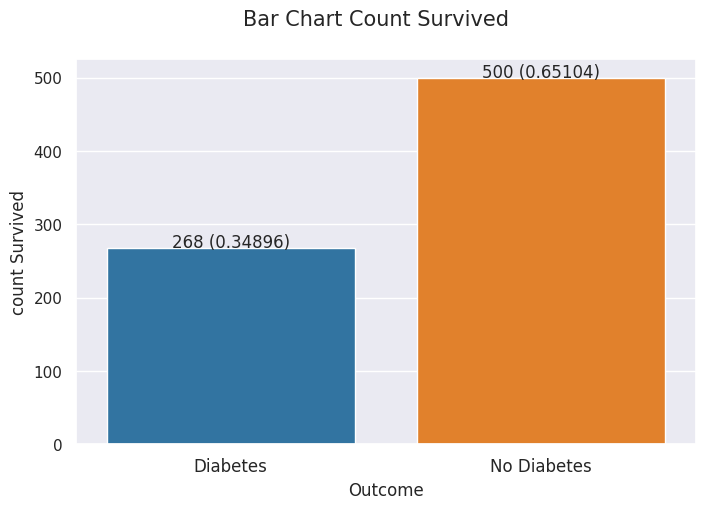

In [8]:
plot_bar(
    data[['Outcome']].replace({0: 'No Diabetes', 1: 'Diabetes'}),
    paleta=paleta,
    ejeX='Outcome',
    ejey='count Survived',title='Count Survived', p=True)

For every person with diabetes, there are approximately 1.86 healthy people.

In [9]:
data[data['Outcome'] == 0].shape[0]/data[data['Outcome'] == 1].shape[0]

1.8656716417910448

# **Data Split**
---

In [10]:
X = data.iloc[:, :8]
y = data.iloc[:, 8]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=random_seed,
    shuffle=True,
    stratify=y
)

# **Preprocesing**
---

In [12]:
numeric_columns = X_train.select_dtypes(
    include=['int32', 'float32']
).columns.to_list()

In [13]:
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [14]:
X_train_prep = numeric_transformer.fit_transform(X_train)
X_test_prep = numeric_transformer.transform(X_test)

# **Model**
---

For this exercise, two neural network architectures were implemented.

**Reference model**



This architecture has three layers: the input layer (8 inputs), one hidden layer (6 neurons), and an output layer.

In [15]:
model_one = Sequential()
model_one.add(Dense(
    6,
    input_dim=8,
    activation='relu',
    kernel_initializer='glorot_uniform'))
model_one.add(Dense(
    1,
    activation='sigmoid',
    kernel_initializer='glorot_uniform'))

**Model compilation**

In [16]:
model_one.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy',
        keras.metrics.F1Score()
        ]
)


In [17]:
one_history = model_one.fit(
    X_train_prep,
    y_train,
    validation_data = (X_test_prep, y_test),
    epochs=500,
    batch_size = 16,
    verbose = 0
)

There are approximately 43 batches with 16 records to update the neural network

In [18]:
X_train_prep.shape[0]/16

40.75

In [19]:
model_one.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (744.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124 (500.00 B)

In [20]:
one_history.history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

**second model**

This architecture has five layers: the input layer (8 inputs), three hidden layers with 6, 3, and 2 neurons respectively, and an output layer

In [21]:
model_two = Sequential()
model_two.add(Dense(8, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model_two.add(Dropout(0.4))
model_two.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model_two.add(Dropout(0.2))
model_two.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

**Model compilation**

In [22]:
model_two.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        keras.metrics.F1Score()]
)

In [23]:
two_history = model_two.fit(
    X_train_prep,
    y_train,
    validation_data=(X_test_prep, y_test),
    epochs=200,
    batch_size=15,
    verbose=0
)

In [24]:
model_two.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 308 (1.21 KB)

In [25]:
two_history.history.keys()

dict_keys(['f1_score', 'loss', 'val_f1_score', 'val_loss'])

**Optimization learning curves**



There is no convergence; an overfitting problem is present, since the test error increases with each epoch.

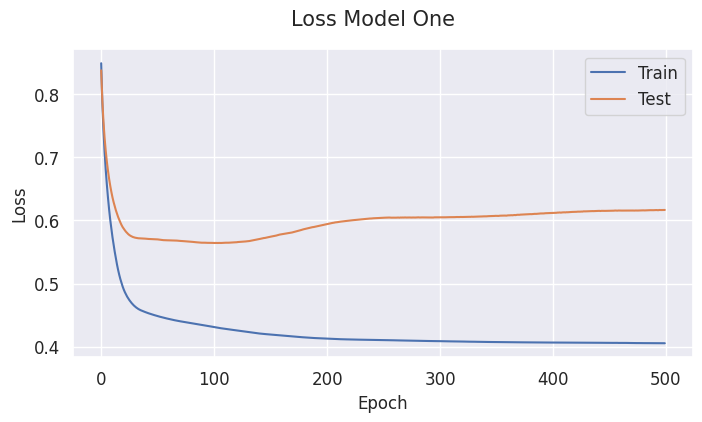

In [26]:
optimization_learning_curves(one_history, metrica='loss', title='Loss Model One')

- Training Curve Behavior (**Train**). The training loss decreases continuously and steadily. It appears that the model is learning well on the training set.

- The **test** loss decreases initially, but after a point (around epoch 50), it starts to increase progressively. This is a clear sign of overfitting.

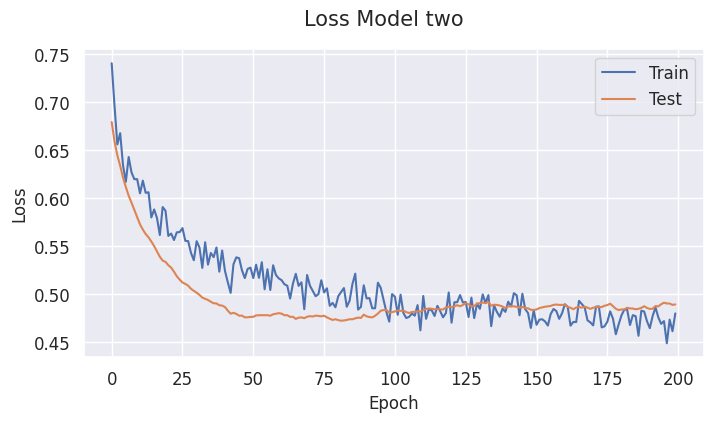

In [27]:
optimization_learning_curves(two_history, metrica='loss', title='Loss Model two')


- The model is learning correctly.
- There doesn’t appear to be strong overfitting.
- The model reaches a saturation point.
- After about 70–100 epochs, there are no major improvements.

- The **training** curve fluctuates due to the use of dropout. This does not indicate an error, but rather typical behavior of models with regularization.
- The **test** curve does not apply dropout, so it is more stable.

# **Predictions**
---

In [28]:
y_pred_one = (model_one.predict(X_test_prep)>0.5).astype('int')
y_pred_two = (model_two.predict(X_test_prep)>0.5).astype('int')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [29]:
y_pred_one = np.reshape(y_pred_one, y_pred_one.shape[0])
y_pred_two = np.reshape(y_pred_two, y_pred_two.shape[0])

**Confusion Matrix**

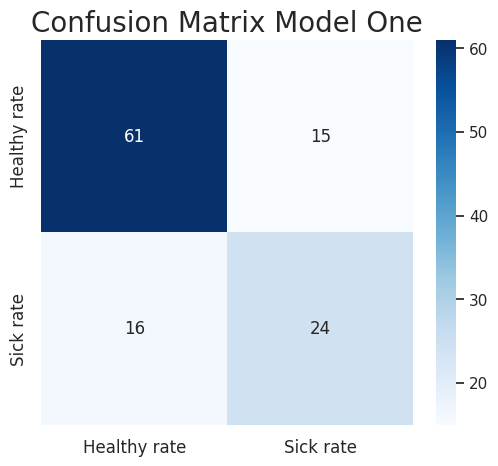

In [30]:
kward = {"cmap": "Blues", "annot_kws": {"size":12}}
matrix = matrix_confusion(
    y_test,
    y_pred_one,
    title='Confusion Matrix Model One',
    churm="Sick rate",
    no_churm="Healthy rate",
    **kward)

Model One has a better detection rate for sick patients (more true positives, fewer false negatives). It detects patients more accurately (more true positives), but with overfitting, performance on new data can be unstable or vary.

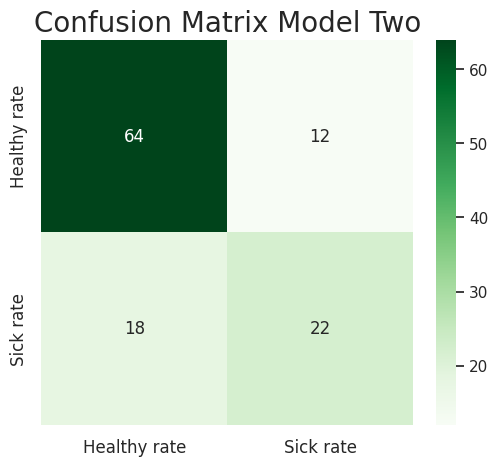

In [31]:
kward = {"cmap": "Greens", "annot_kws": {"size":12}}
matrix = matrix_confusion(
    y_test,
    y_pred_two,
    title='Confusion Matrix Model Two',
    churm="Sick rate",
    no_churm="Healthy rate",
    **kward)

- The model has lower sensitivity for detecting sick patients, but the difference is minimal compared to the first model.

- It reduces the risk of generating unnecessary alarms, avoiding misdiagnoses that could cause stress, unnecessary treatments, or additional costs.

In [32]:
def metricas(validation, prediction, matrix, label:list=[1])->None:
  accuracy = '%.3f' % metrics.accuracy_score(validation, prediction)
  kappa = '%.3f' % metrics.cohen_kappa_score(validation, prediction)
  precision = '%.3f' % metrics.precision_score(
      validation, prediction, labels=label, average="micro")
  recall = '%.3f' % metrics.recall_score(
      validation, prediction, labels=label, average="micro")
  f1_score = '%.3f' % metrics.f1_score(
      validation, prediction, labels=label, average="micro")

  print(f'Accuracy  :   {accuracy}')
  print(f'Kappa     :   {kappa}')
  print(f'predicción enfermos')
  print(f'Precision:   {precision}')
  print(f'Recall    :   {recall}')

  VN, FP = 0, 0
  if label == [1]:
    VN = matrix[0,0]
    FP = matrix[0,1]
  else:
    VN = matrix[0,0]
    FP = matrix[0,1]
  specificity = VN/(VN+FP)
  specificity = '%.3f' %  specificity

  print(f'Specificity:   {specificity}')
  print(f'F1-score   :   {f1_score}')
  return accuracy, kappa, precision, recall, f1_score, specificity

In [33]:
accuracy, kappa, precision, recall, f1_score, specificity = metricas(
    y_test,
    y_pred_one,
    matrix)

Accuracy  :   0.733
Kappa     :   0.405
predicción enfermos
Precision:   0.615
Recall    :   0.600
Specificity:   0.842
F1-score   :   0.608


In [34]:
accuracy, kappa, precision, recall, f1_score, specificity = metricas(
    y_test,
    y_pred_two,
    matrix)

Accuracy  :   0.741
Kappa     :   0.407
predicción enfermos
Precision:   0.647
Recall    :   0.550
Specificity:   0.842
F1-score   :   0.595


**Model One**

- Advantage: Higher sensitivity for sick patients (Recall 0.60), higher F1-score (0.608), indicating it better achieves the goal of identifying sick patients.

- Disadvantage: Shows overfitting (learning curves show much lower training loss than test loss), so real-world performance on new data may degrade.

Despite over-optimization, it remains more effective at detecting sick patients than Model Two.

**Model Two**

- Advantage: Stable model, better generalization (train ≈ test), avoids overfitting, and maintains high specificity (0.842).

- Disadvantage: Detects fewer sick patients (Recall 0.55, F1-score 0.595), partially compromising the primary objective.

 Reliable and balanced, but sacrifices sensitivity in favor of stability and fewer false positives.

# **# Insights / Conclusions**
---

- The F1-scores of both models are moderate (0.608 for Model One and 0.595 for Model Two), indicating that the neural network is not detecting sick patients with sufficient reliability.

- In a clinical context, each false negative carries a high cost, as missing an undiagnosed case of diabetes can have serious consequences.
- In practice, a physician could easily outperform these F1-scores, especially since the models here show overfitting or insufficient generalization.

- The Pima dataset has 768 records, of which approximately 268 are positive (diabetes) and 500 are negative (healthy).
- For neural networks, which have many parameters, this is very little data, leading to:
- Overfitting: the model learns very specific patterns from the training set but does not generalize well (as seen in Model One).
- High variance: unstable results across different training runs.

**Conclusion on the Causes of Low Performance**


- Small dataset: overfitting, poor generalization.

- Non-representative dataset: learned patterns do not reflect the general population.

- Limited features: deep networks lack sufficient information to distinguish sick from healthy patients.

- Model inappropriate for dataset size: the neural network is too complex for this dataset; simpler models could perform equally well or better.

# **Info**
---
**@By**: Steven Bernal

**@Nickname**: Kaiziferr

**@Git**: https://github.com/Kaiziferr